In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
dataset = pd.read_csv("heart_disease_uci_cleaned_dataset.csv")

In [3]:
dataset

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,675,60,Male,asymptomatic,125.0,0.0,False,normal,110.0,False,0.1,upsloping,2.0,normal,1
302,676,60,Male,asymptomatic,130.0,0.0,False,st-t abnormality,130.0,True,1.1,downsloping,1.0,normal,1
303,691,62,Male,typical angina,120.0,0.0,False,lv hypertrophy,134.0,False,-0.8,flat,2.0,normal,1
304,717,72,Male,non-anginal,160.0,0.0,False,lv hypertrophy,114.0,False,1.6,flat,2.0,normal,0


In [4]:
df = dataset

In [5]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
dataset.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [7]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

### Feature Encoding

In [8]:
## Binary feature encoding
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

In [9]:
df['sex'] = le1.fit_transform(df['sex'])
df['fbs'] = le2.fit_transform(df['fbs'])
df['exang'] = le3.fit_transform(df['exang'])

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0.0,fixed defect,0
1,67,1,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,3.0,normal,1
2,67,1,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,2.0,reversable defect,1
3,37,1,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0
4,41,0,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0


In [11]:
## Ordinal encoding for cp column
from sklearn.preprocessing import OrdinalEncoder
ordinal_map = {
    'typical angina': 1,
    'non-anginal': 2,
    'atypical angina': 3,
    'asymptomatic': 4
}
df['cp'] = df['cp'].map(ordinal_map)

In [12]:
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [13]:
## Ordinal encoding for restecg column
restecg_map = {
    'normal': 1,
    'st-t abnormality': 2,
    'lv hypertrophy': 3
}
df['restecg'] = df['restecg'].map(restecg_map)

In [14]:
df['slope'].unique()

array(['downsloping', 'flat', 'upsloping'], dtype=object)

In [15]:
## Ordinal encoding for slope column
slope_map = {
    'upsloping': 1,
    'flat': 2,
    'downsloping': 3
}
df['slope'] = df['slope'].map(slope_map)

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145.0,233.0,1,3,150.0,0,2.3,3,0.0,fixed defect,0
1,67,1,4,160.0,286.0,0,3,108.0,1,1.5,2,3.0,normal,1
2,67,1,4,120.0,229.0,0,3,129.0,1,2.6,2,2.0,reversable defect,1
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,3,0.0,normal,0
4,41,0,3,130.0,204.0,0,3,172.0,0,1.4,1,0.0,normal,0


In [17]:
df['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

In [18]:
## Ordinal encoding for thal column
thal_map = {
    'normal': 1,
    'fixed defect': 2,
    'reversable defect': 3
}
df['thal'] = df['thal'].map(thal_map)

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145.0,233.0,1,3,150.0,0,2.3,3,0.0,2,0
1,67,1,4,160.0,286.0,0,3,108.0,1,1.5,2,3.0,1,1
2,67,1,4,120.0,229.0,0,3,129.0,1,2.6,2,2.0,3,1
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,3,0.0,1,0
4,41,0,3,130.0,204.0,0,3,172.0,0,1.4,1,0.0,1,0


In [20]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,54.633987,0.683007,3.049020,131.647059,242.513072,0.143791,1.993464,148.820261,0.333333,1.048693,1.607843,0.683007,1.823529,0.470588
std,9.005100,0.466067,1.037438,17.680950,60.708669,0.351452,0.991748,23.201831,0.472177,1.157703,0.619204,0.937824,0.955520,0.499952
min,29.000000,0.000000,1.000000,94.000000,0.000000,0.000000,1.000000,71.000000,0.000000,-0.800000,1.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,209.250000,0.000000,1.000000,132.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,240.000000,0.000000,2.000000,152.000000,0.000000,0.800000,2.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,274.750000,0.000000,3.000000,165.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,3.000000,202.000000,1.000000,6.200000,3.000000,3.000000,3.000000,1.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       306 non-null    int64  
 1   sex       306 non-null    int64  
 2   cp        306 non-null    int64  
 3   trestbps  306 non-null    float64
 4   chol      306 non-null    float64
 5   fbs       306 non-null    int64  
 6   restecg   306 non-null    int64  
 7   thalch    306 non-null    float64
 8   exang     306 non-null    int64  
 9   oldpeak   306 non-null    float64
 10  slope     306 non-null    int64  
 11  ca        306 non-null    float64
 12  thal      306 non-null    int64  
 13  num       306 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 33.6 KB


### Visual Representation

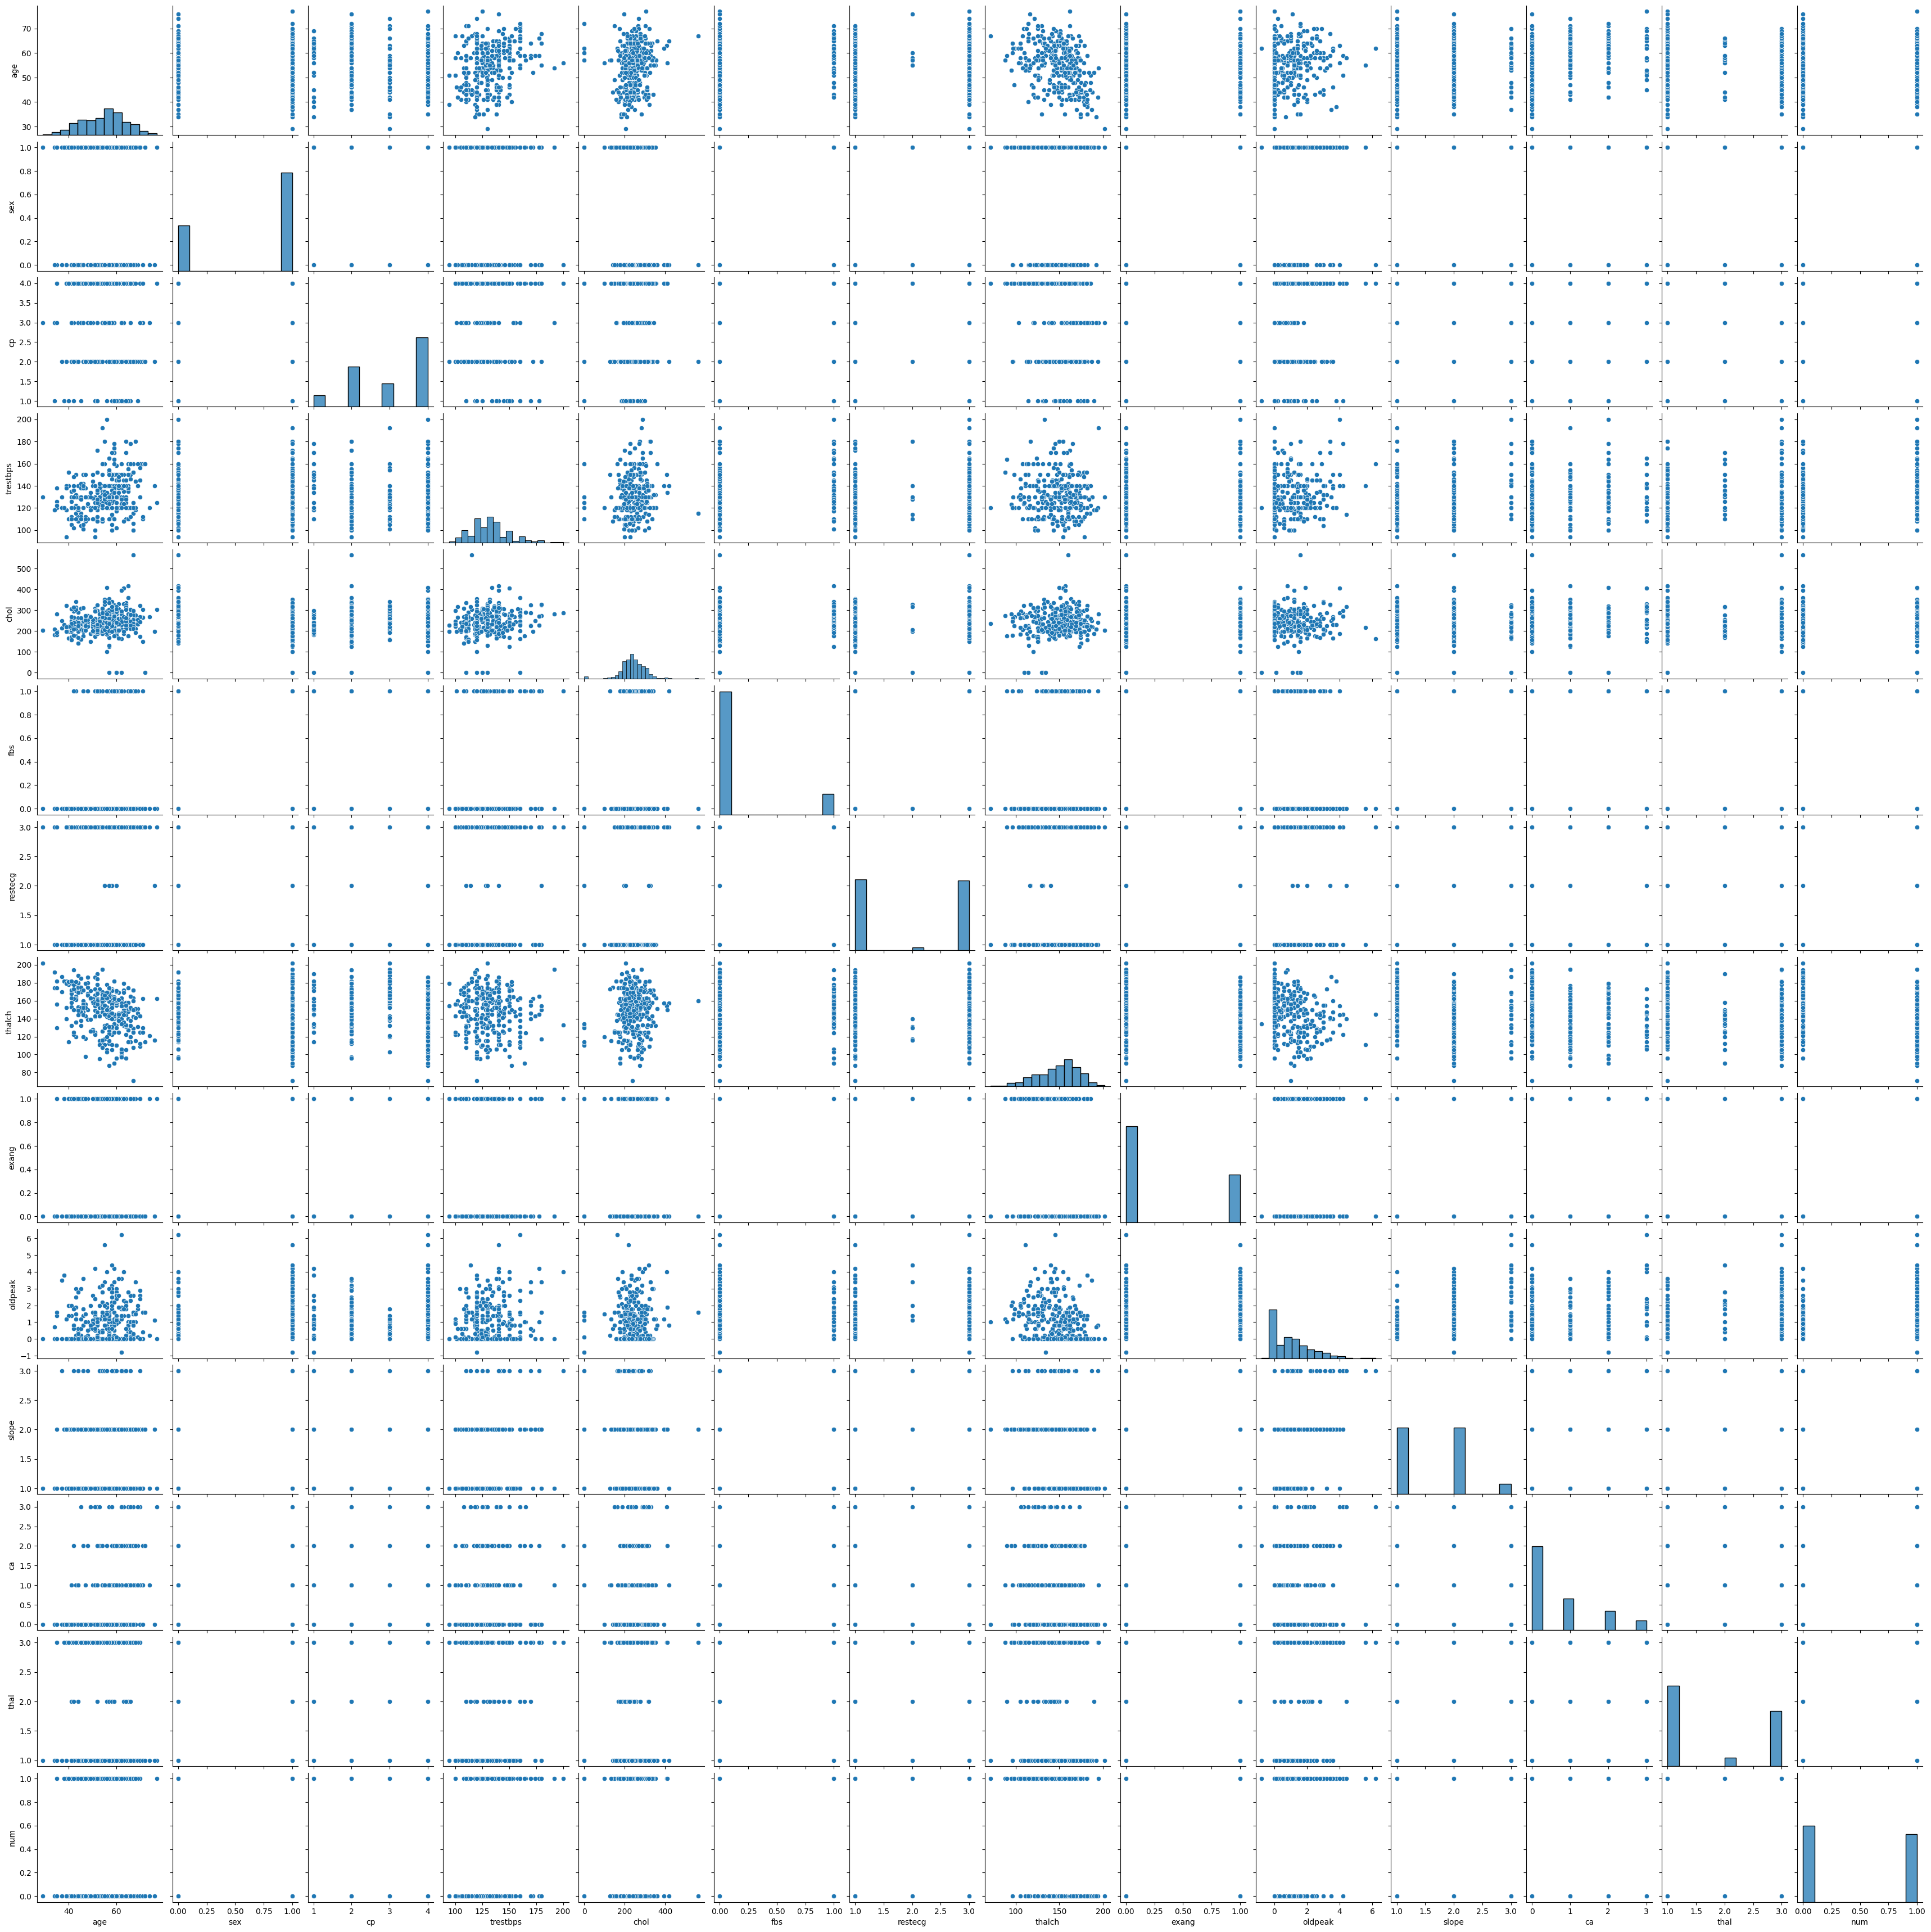

In [22]:

# making a pairplot
plt.Figure(figsize=(15,15))
# plt.rcParams['figure.figsize'] = (15, 15)
sns.pairplot(df)

<Axes: >

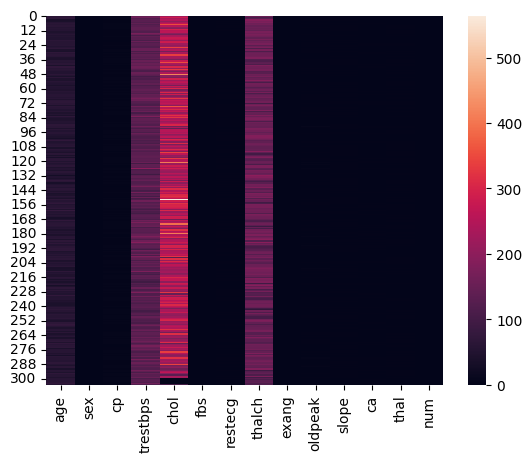

In [23]:
plt.Figure(figsize=(15,15))
sns.heatmap(df)

<Axes: xlabel='age', ylabel='Count'>

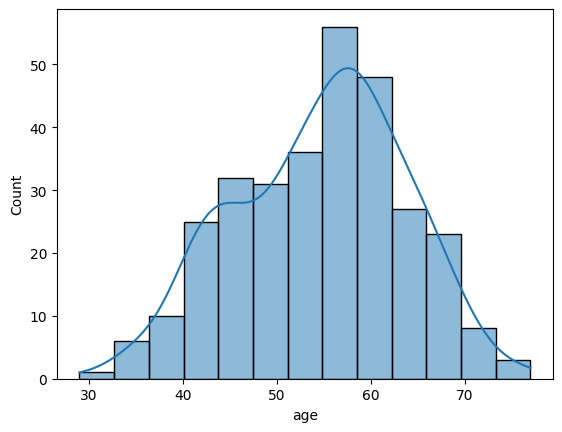

In [24]:
# checking the distribution of age amonng the patients
sns.histplot(data=df, x="age", kde=True)

In [25]:
df['sex'].value_counts()

sex
1    209
0     97
Name: count, dtype: int64

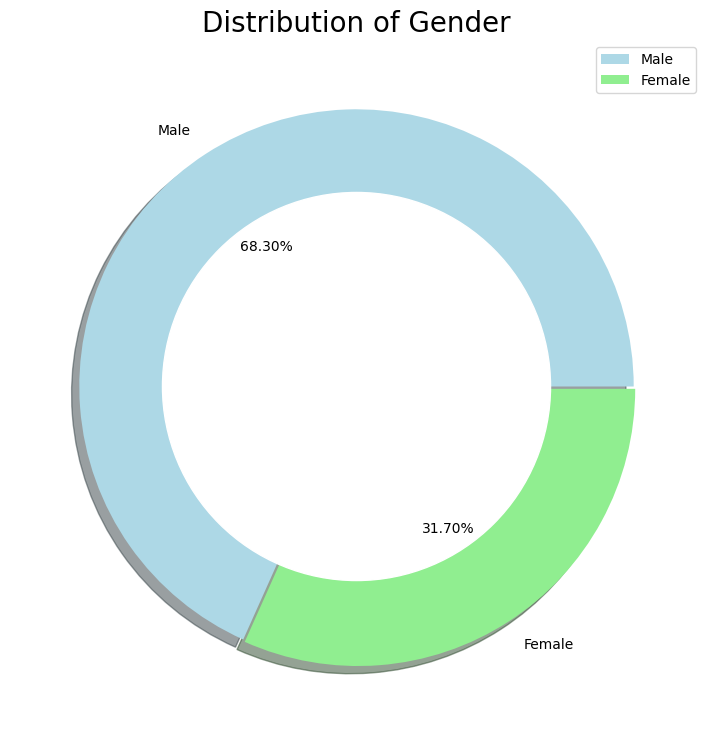

In [26]:
# plotting a donut chart for visualizing each of the recruitment channel's share
size = [209, 97]
colors = ['lightblue', 'lightgreen']
labels = "Male", "Female"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [27]:
df['cp'].unique()

array([1, 4, 2, 3])

(array([ 24.,   0.,   0.,  85.,   0.,   0.,  49.,   0.,   0., 148.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

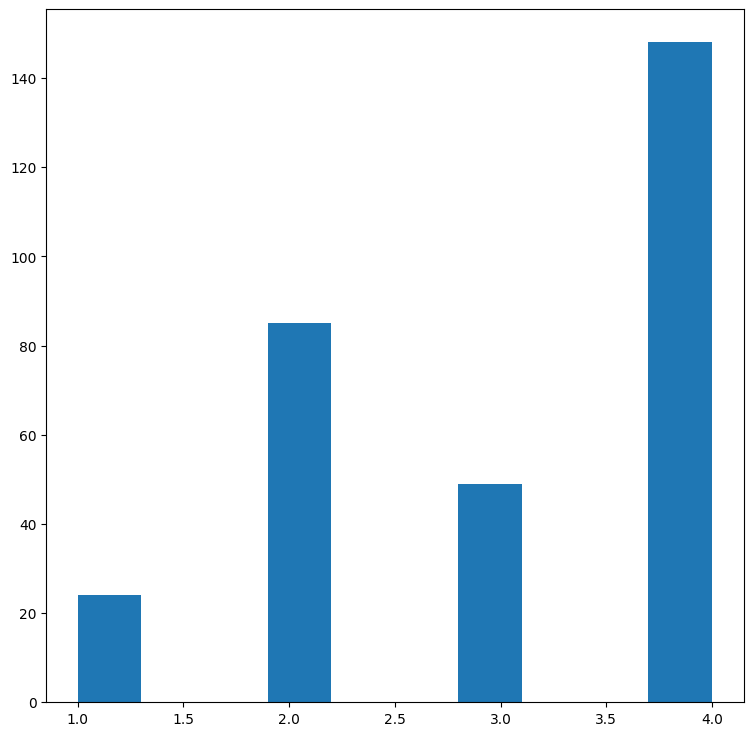

In [28]:
plt.Figure(figsize=(10,10))
plt.hist(data=df,x='cp')

(array([162.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 144.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

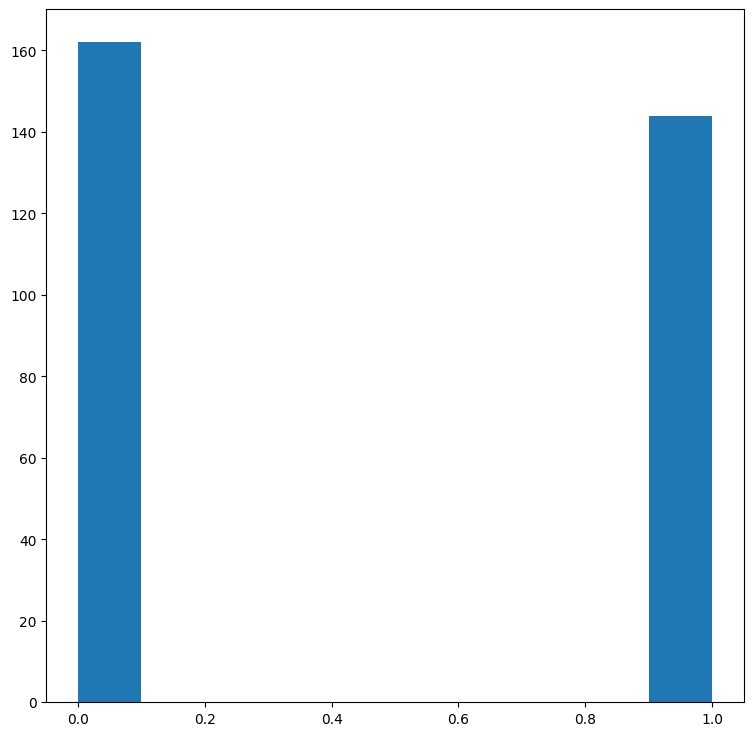

In [29]:
# target (num)
plt.Figure(figsize=(15,15))
plt.hist(data=df,x='num')

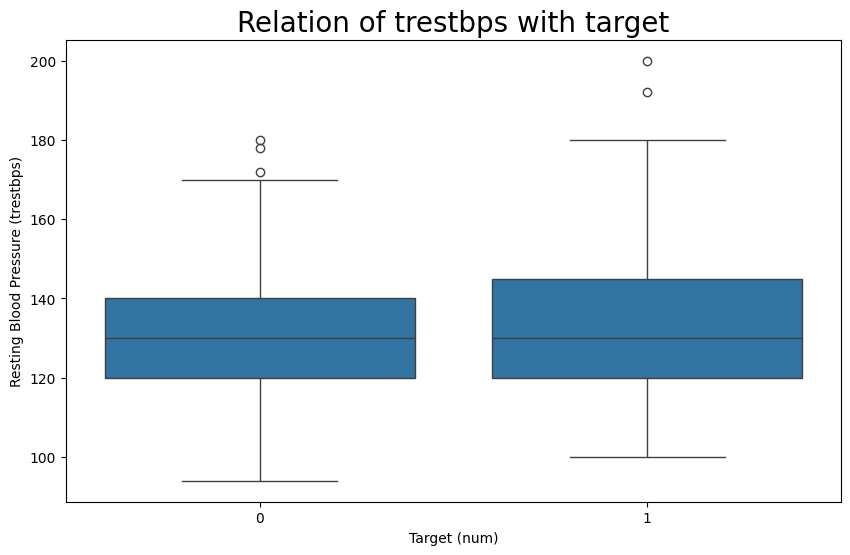

In [30]:
# tresbps vs target
plt.figure(figsize=(10,6))
sns.boxplot(x=df['num'], y=df['trestbps'])
plt.title('Relation of trestbps with target', fontsize=20)
plt.xlabel('Target (num)')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.show()

<Axes: xlabel='num', ylabel='chol'>

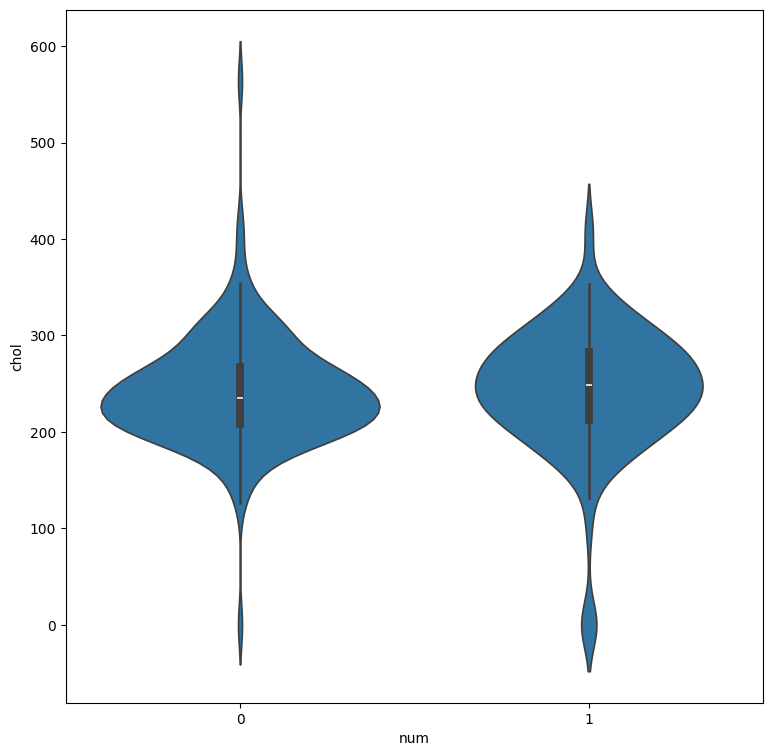

In [31]:
## chol vs num
sns.violinplot(data=df,x='num',y='chol')

In [32]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145.0,233.0,1,3,150.0,0,2.3,3,0.0,2,0
1,67,1,4,160.0,286.0,0,3,108.0,1,1.5,2,3.0,1,1
2,67,1,4,120.0,229.0,0,3,129.0,1,2.6,2,2.0,3,1
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,3,0.0,1,0
4,41,0,3,130.0,204.0,0,3,172.0,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,60,1,4,125.0,0.0,0,1,110.0,0,0.1,1,2.0,1,1
302,60,1,4,130.0,0.0,0,2,130.0,1,1.1,3,1.0,1,1
303,62,1,1,120.0,0.0,0,3,134.0,0,-0.8,2,2.0,1,1
304,72,1,2,160.0,0.0,0,3,114.0,0,1.6,2,2.0,1,0


### Model Training

In [33]:
data = pd.read_csv("heart_disease_uci_cleaned_dataset.csv")

In [34]:
y = data['num']
data = data.drop('num',axis=1)

In [35]:
y.shape

(306,)

In [36]:
data.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


In [37]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [38]:
data = pd.get_dummies(data, drop_first=True).astype(float)

In [39]:
data.head()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,67.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,67.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,37.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,41.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [70]:
data.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca',
       'sex_Male', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'restecg_normal', 'restecg_st-t abnormality', 'slope_flat',
       'slope_upsloping', 'thal_normal', 'thal_reversable defect'],
      dtype='object')

In [40]:
X = data
X.shape

(306, 18)

In [41]:
X.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca',
       'sex_Male', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'restecg_normal', 'restecg_st-t abnormality', 'slope_flat',
       'slope_upsloping', 'thal_normal', 'thal_reversable defect'],
      dtype='object')

In [42]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

In [44]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [53]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Classifier": RandomForestClassifier(),
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3327
- Mean Absolute Error: 0.2602
- R2 Score: 0.5561
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3535
- Mean Absolute Error: 0.2867
- R2 Score: 0.4955


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.4524
- Mean Absolute Error: 0.4251
- R2 Score: 0.1793
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4577
- Mean Absolute Error: 0.4379
- R2 Score: 0.1541


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3328
- Mean Absolute Error: 0.2607
- R2 Score: 0.5558
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3519
- Mean Absolute Error: 0.2862
- R2 Score: 0.4999


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.3961
- Mean Absolute Error: 0.3254
- R2 Score: 0.3709
-----------------------

### Hyperparameter Tunning

In [46]:
## Model : Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [47]:
#Initialize few parameter for Hyperparamter tuning
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [48]:
randf_model = RandomForestClassifier()

In [49]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

randomf_model = RandomizedSearchCV(estimator=randf_model,
                                   param_distributions=rf_params,
                                   n_iter=100,
                                   cv=5,
                                   verbose=2,
                                   n_jobs=-1)
randomf_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [5, 8, ...], 'max_features': [5, 7, ...], 'min_samples_split': [2, 8, ...], 'n_estimators': [100, 200, ...]}"
,n_iter,100
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [ ]:
### previous params
# n_estimator = 1000
# max_depth = 8
# min_samples_split = 15
# max_features = 5

In [64]:
## Go back to previous parameters
random_model = RandomForestClassifier(n_estimators=1000,max_depth=8,min_samples_split=15,max_features=5)
random_model.fit(X_train,y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,8
,min_samples_split,15
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [65]:
y_pred = random_model.predict(X_test)


In [66]:
## performance metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print("Training accuracy : ", randomf_model.score(X_train,y_train))
print("Testing accuracy : ", randomf_model.score(X_test,y_test))

[[31  3]
 [ 6 22]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        34
           1       0.88      0.79      0.83        28

    accuracy                           0.85        62
   macro avg       0.86      0.85      0.85        62
weighted avg       0.86      0.85      0.85        62

0.8548387096774194
Training accuracy :  0.9262295081967213
Testing accuracy :  0.8225806451612904


Sensitivity = TruePositives/TruePositives+FalseNegatives

Specificity = FalseNegatives/FalseNegatives+TruePositives

In [67]:
cm = confusion_matrix(y_test,y_pred)

total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8378378378378378
Specificity :  0.88


In [69]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

### Convert ot Pickle file

In [68]:
import pickle

# Save model
with open('model.pkl', 'wb') as f:
    pickle.dump(random_model, f)